In [292]:
import pandas as pd

In [293]:
data=pd.read_csv('train.csv')

In [294]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
import matplotlib.pyplot as plt

In [296]:
import seaborn as sns

In [297]:
sns.set()

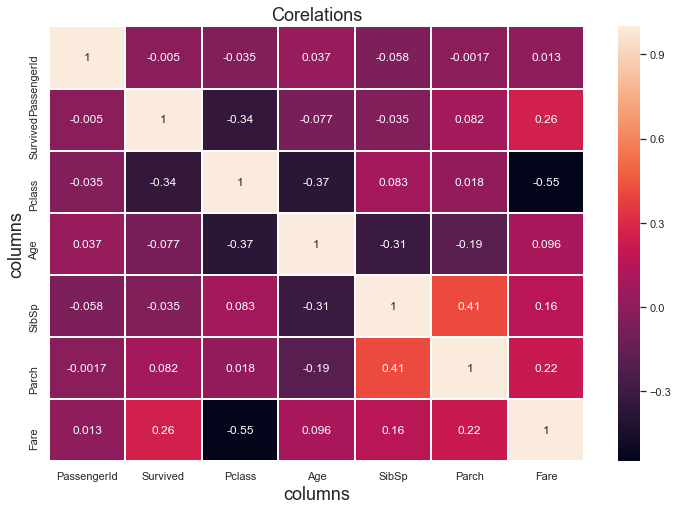

In [298]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='w')
plt.title('Corelations',fontsize=18)
plt.xlabel('columns',fontsize=18)
plt.ylabel('columns',fontsize=18)
plt.savefig('titanic.png')

In [299]:
data.dtypes
#heat map contains only numerical columns

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [300]:
numerical_data=data[['PassengerId','Pclass','Fare']].copy()

In [301]:
survival_data=data['Survived'].copy()

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X,x_test,Y,y_test=train_test_split(numerical_data,survival_data,test_size=0.3,random_state=5)

In [304]:
from sklearn.linear_model import LogisticRegression

In [305]:
model=LogisticRegression()

In [306]:
model.fit(X,Y)

C:\Users\VANSH NARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [307]:
cofficients = model.coef_

In [308]:
coef_dict={
    'PassengerID':cofficients[0][0],
    
    'Pclass':cofficients[0][1],
    'Fare':cofficients[0][2]
}

In [309]:
coef_dict=pd.Series(coef_dict)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

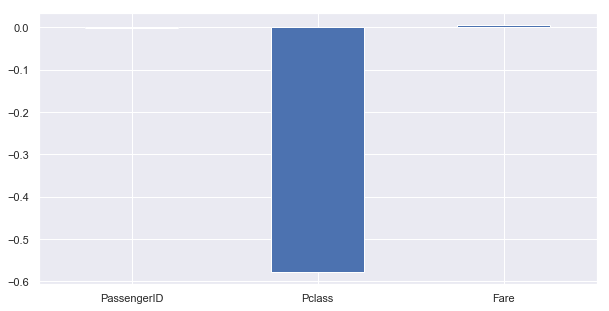

In [310]:
plt.figure(figsize=(10,5))
coef_dict.plot(kind='bar')
plt.xticks(rotation=0)

In [311]:
predictions=model.predict(x_test)

In [312]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [313]:
confusion=confusion_matrix(predictions,y_test)

In [314]:
confusion

array([[150,  60],
       [ 17,  41]], dtype=int64)

In [315]:
score=accuracy_score(predictions,y_test)

In [316]:
score


0.7126865671641791

Importing the test data

In [317]:
test_data=pd.read_csv('test.csv')

In [318]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [319]:
test_data1=test_data[['PassengerId','Pclass','Fare']].copy()

In [320]:
test_data1.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
dtype: int64

In [321]:
test_data1['Fare']=test_data['Fare'].fillna(10)

In [322]:
test_predictions=model.predict(test_data1)

In [323]:
test_predictions[:3]

array([0, 0, 0], dtype=int64)

In [324]:
test_predictions_df={
    'PassengerId':test_data['PassengerId'],
    'Survived':test_predictions
}

In [325]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [326]:
test_predictions_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [327]:
test_predictions_df=test_predictions_df.set_index('PassengerId')

In [328]:
test_predictions_df.to_csv('submission.csv')

# To increase accuracy

In [329]:
numerical_data1=data[['PassengerId','Parch','Pclass','Sex']].copy()

In [330]:
numerical_data1['Sex']=numerical_data1['Sex'].map({'female':1,'male':0})

In [331]:
numerical_data1.head()

,PassengerId,Parch,Pclass,Sex
0,1,0,3,0
1,2,0,1,1
2,3,0,3,1
3,4,0,1,1
4,5,0,3,0


In [332]:
survival_data1=data['Survived'].copy()

In [333]:
X,x_test,Y,y_test=train_test_split(numerical_data1,survival_data1,test_size=0.3,random_state=42)

In [334]:
model=LogisticRegression()

In [335]:
numerical_data1.isnull().sum()


PassengerId    0
Parch          0
Pclass         0
Sex            0
dtype: int64

In [336]:
data1=data.copy()

In [337]:
data1['Sex']=data['Sex'].map({'female':1,'male':0})

In [338]:
stack=data1[['Sex','Survived']]


In [339]:
gender=stack['Sex'].value_counts()

In [340]:
sur=stack['Survived'].value_counts().head()

In [341]:
final=data1.groupby('Sex')['Survived'].value_counts()

In [342]:
final

Sex  Survived
0    0           468
     1           109
1    1           233
     0            81
Name: Survived, dtype: int64

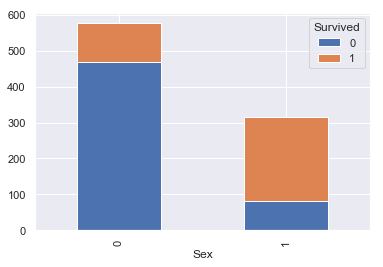

In [343]:
final.unstack().plot(kind='bar',stacked=True)

In [344]:
new_data=final.groupby(level=0).apply(lambda x:round(100*x/x.sum()))

In [345]:
new_data

Sex  Survived
0    0           81.0
     1           19.0
1    1           74.0
     0           26.0
Name: Survived, dtype: float64

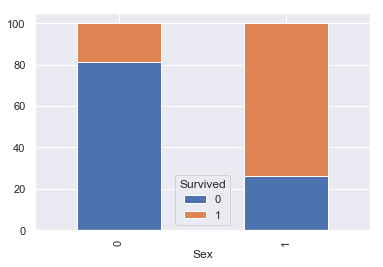

In [346]:
new_data.unstack().plot(kind='bar',stacked=True)

In [347]:
model.fit(X,Y)

C:\Users\VANSH NARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [348]:
predictions=model.predict(x_test)


In [349]:
confusion=confusion_matrix(predictions,y_test)

In [350]:
confusion

array([[135,  34],
       [ 22,  77]], dtype=int64)

In [351]:
score=accuracy_score(predictions,y_test)

In [352]:
score

0.7910447761194029

In [353]:
test_data2=test_data[['PassengerId','Parch','Pclass','Sex']].copy()

In [354]:
test_data2['Sex']=test_data2['Sex'].map({'female':1,'male':0})

In [355]:
test_predictions=model.predict(test_data2)

In [356]:
test_predictions_df={
    'PassengerId':test_data['PassengerId'],
    'Survived':test_predictions
}

In [357]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [358]:
test_predictions_df=test_predictions_df.set_index('PassengerId')

In [359]:
test_predictions_df.head()


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [360]:
test_predictions_df.to_csv('finalsubmission.csv')

# Cross Validation

In [361]:
from sklearn.model_selection import cross_val_score

In [362]:
x1=numerical_data1
y1=survival_data1

In [363]:
model2=LogisticRegression()

In [364]:
lin_score=cross_val_score(model2,x1,y1,cv=5,scoring='accuracy')

C:\Users\VANSH NARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VANSH NARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VANSH NARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VANSH NARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VANSH NARANG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [365]:
lin_score

array([0.81005587, 0.80446927, 0.78651685, 0.75280899, 0.79096045])

In [366]:
lin_score.mean()

0.7889622868677669

# KNN

In [367]:
from sklearn.neighbors import KNeighborsClassifier

In [368]:
knn_model = KNeighborsClassifier()

In [369]:
knn_model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [370]:
knn_predictions = knn_model.predict(x_test)

In [371]:
knn_score = accuracy_score(knn_predictions, y_test)

In [372]:
knn_score

0.5597014925373134

# KNN with Grid search

In [373]:
from sklearn.model_selection import GridSearchCV

In [374]:
grid_params={
    'n_neighbors' : [3,5,6,19,20],
    'weights': ['uniform','distance']
}

In [375]:
gs=GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    #verbose = 1
    cv=3,
    n_jobs=-1
)

In [376]:
gs_result=gs.fit(X,Y)

In [377]:
gs_prediction=gs.predict(x_test)

In [378]:
gs_prediction[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [379]:
gs_score=accuracy_score(gs_prediction,y_test)

In [380]:
gs_score

0.5447761194029851

In [381]:
gs_accuracy=gs_result.best_score_

In [382]:
gs_accuracy

0.6131621187800963

In [383]:
gs_result.best_params_

{'n_neighbors': 20, 'weights': 'uniform'}

# Decision Tree

In [384]:
from sklearn.tree import DecisionTreeClassifier

In [385]:
decision_model = DecisionTreeClassifier()

In [386]:
decision_model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [387]:
decision_predictions = decision_model.predict(x_test)

In [388]:
decision_score = accuracy_score(decision_predictions, y_test)

In [389]:
decision_score

0.7126865671641791